In this exercise, we create a linear regression model in one variable by minimizing the cost function using the gradient descent algorithm. Let's begin by plotting the data.

In [1]:
%%file plotData.m

function plotData(x, y)

figure;

plot(x,y,'rx','MarkerSize', 10);
xlabel('population');
ylabel('profit');

Created file 'C:\Varun\Programming\machine-learning\tutorials\1_andrewng_machine_learning\week2\matlab_solutions\plotData.m'.


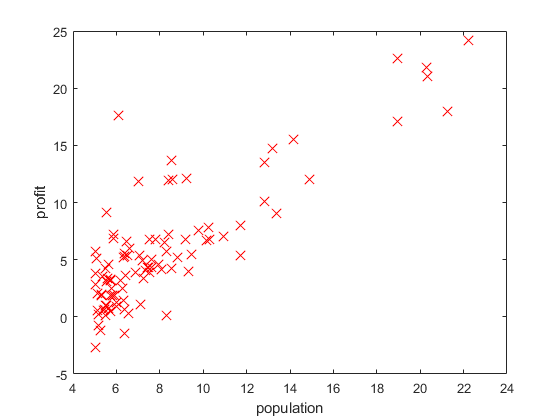

In [3]:
data = load('..\machine-learning-ex1\ex1\ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

plotData(X, y);

The next step is to minimize the cost function over theta. Let's define the functions that compute cost and then find theta using gradient descent.

In [4]:
%%file computeCost.m

function J = computeCost(X, y, theta)
m = length(y); % number of training examples
J = (sum((X*theta - y).^2))./(2*m);
end

Created file 'C:\Varun\Programming\machine-learning\tutorials\1_andrewng_machine_learning\week2\matlab_solutions\computeCost.m'.


In [5]:
%%file gradientDescent.m

function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

m = length(y); % number of training examples
J_history = zeros(num_iters, 1);
 
for iter = 1:num_iters
    temp_theta = theta - (alpha./m).*(X'*(X*theta - y));

    %update theta with the newly calculated theta
    theta = temp_theta;
    J_history(iter) = computeCost(X, y, theta);
end
end

Created file 'C:\Varun\Programming\machine-learning\tutorials\1_andrewng_machine_learning\week2\matlab_solutions\gradientDescent.m'.


Let's test the function that computes the cost function.

In [6]:
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

fprintf('\nTesting the cost function ...\n')
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');


Testing the cost function ...
With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24



Now that we know that the fuction to compute the cost function works, let's compute theta using gradient descent.

In [7]:
fprintf('\nRunning Gradient Descent ...\n')
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');


Running Gradient Descent ...
Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664




Now, let's plot the linear fit and also use the model to predict the profit for known values of the population.

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129



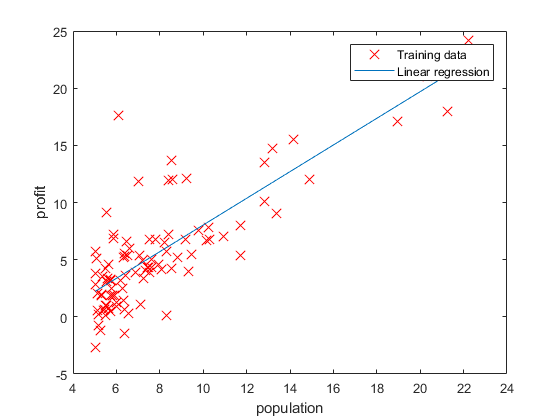

In [8]:
plotData(data(:, 1), y);
% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

Finally, let's visualize the cost function itself.

Visualizing J(theta_0, theta_1) ...



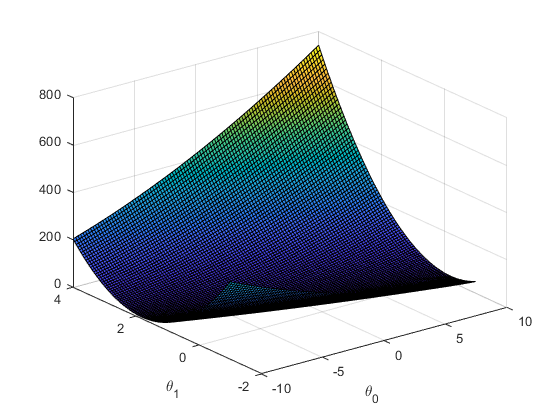

In [9]:
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

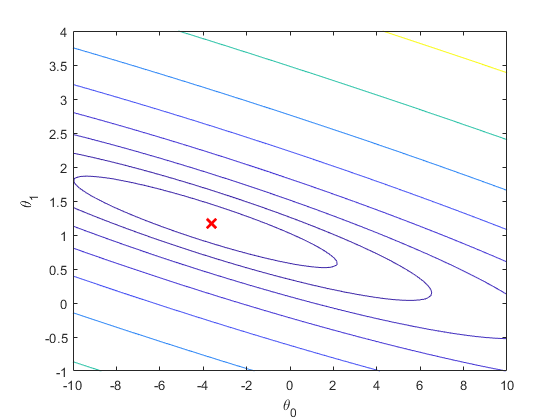

In [10]:
% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);